In [1]:
from keras.datasets import mnist
import numpy as np

(x_train,_), (x_test,_) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train = x_train.astype('float32') / 255                                   # (60000, 28, 28, 1)
x_test  = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), 28, 28, 1))       
x_test  = x_test.reshape((len(x_test), 28, 28, 1))

In [4]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [6]:
## Encoding

input_img = Input(shape=(28, 28, 1))   # adapt this if using `channels_first

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# None, 28, 28, 16
x = MaxPooling2D((2, 2), padding='same')(x)
# None, 14, 14, 16
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# None, 14, 14, 8
x = MaxPooling2D((2, 2), padding='same')(x)
# None, 7, 7, 8
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# None, 7, 7, 8
encoded = MaxPooling2D((2, 2), padding='same')(x)
# None, 4, 4, 8

In [9]:
## Decoding

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# None, 4, 4, 8
x = UpSampling2D((2, 2))(x)                                        # 확장된 빈값은 평균값을 채운다.
# None, 8, 8, 8
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# None, 8, 8, 8
x = UpSampling2D((2, 2))(x)
# None, 16, 16, 8
x = Conv2D(16, (3, 3), activation='relu')(x)
# None, 14, 14, 16
x = UpSampling2D((2, 2))(x)
# None, 28, 18, 16
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# None, 28, 18, 1

In [10]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 53s 884us/step - loss: 0.2545 - val_loss: 0.1967
Epoch 2/50
60000/60000 [==============================] - 52s 874us/step - loss: 0.1788 - val_loss: 0.1679
Epoch 3/50
60000/60000 [==============================] - 52s 874us/step - loss: 0.1602 - val_loss: 0.1491
Epoch 4/50
60000/60000 [==============================] - 52s 873us/step - loss: 0.1502 - val_loss: 0.1427
Epoch 5/50
60000/60000 [==============================] - 52s 867us/step - loss: 0.1427 - val_loss: 0.1390
Epoch 6/50
60000/60000 [==============================] - 50s 838us/step - loss: 0.1368 - val_loss: 0.1293
Epoch 7/50
60000/60000 [==============================] - 50s 840us/step - loss: 0.1324 - val_loss: 0.1312
Epoch 8/50
60000/60000 [==============================] - 51s 842us/step - loss: 0.1295 - val_loss: 0.1280
Epoch 9/50
60000/60000 [==============================] - 52s 871us/step - loss: 0.1268 - val

In [12]:
decoded_imgs = autoencoder.predict(x_test)

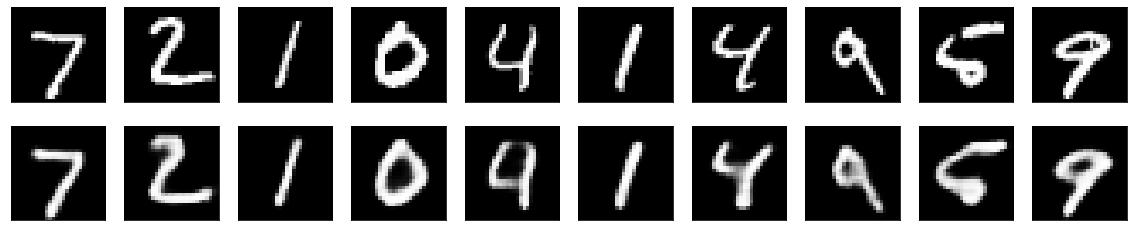

In [14]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()